In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/'My Drive'/'Colab Notebooks'/DL_HW/

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks/DL_HW


# **1.1.Plot the data using plot function.**


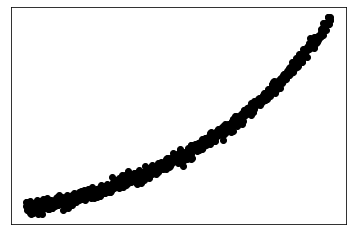

In [3]:
file_name = 'data.mat'

HW1_data = sio.loadmat(file_name)

plt.scatter(HW1_data['x'], HW1_data['y'],  color='black')

plt.xticks(())
plt.yticks(())

plt.show()

# **1.2.Compute the least square line 𝑦 = 𝜃𝟎 + 𝑥𝜃𝟏 using the given data and overlay the line over the given data.**


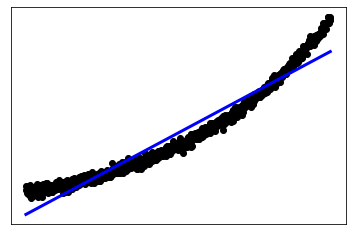

In [4]:
HW1_Y = np.array(HW1_data['y'])
#X加入一個維度的1作為截距
HW1_X = np.hstack((np.ones_like(HW1_data['x']), np.array(HW1_data['x'])))

inverse = np.linalg.inv(HW1_X.T@HW1_X)
w_transpose = np.dot(inverse@HW1_X.T, HW1_Y).reshape(-1,1)

plt.scatter(HW1_data['x'], HW1_data['y'],  color='black')
plt.plot(HW1_data['x'], HW1_X@w_transpose, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# **2.Using the same data from Question 2, compute the least square parabola to fit the data.**
# **Explain which formulation (line or parabola) is more suitable for this dataset and why?**


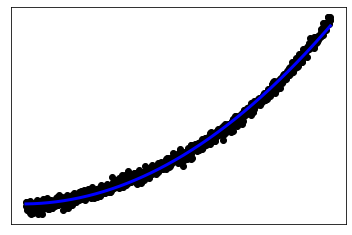

In [5]:
HW2_z = np.hstack((np.ones_like(HW1_data['x']), np.concatenate((np.multiply(HW1_data['x'], HW1_data['x']), HW1_data['x']), axis=1)))
HW2_inverse = np.linalg.inv(HW2_z.T@HW2_z)
HW2_w = np.dot(HW2_inverse@HW2_z.T, HW1_Y)

plt.scatter(HW1_data['x'], HW1_data['y'],  color='black')
plt.plot(HW1_data['x'], np.sum(HW2_w.T*HW2_z, axis=1).reshape(-1,1), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Data本身plot出來的圖形就很明顯並非line，
因此參數較多的parabola可以做出較符合的曲線

# **3.Using the same data from Question 2, now we use the loss function (L1 Norm)below instead of least square based methods. **

[[2.42134606]
 [1.2824548 ]
 [1.62319924]]


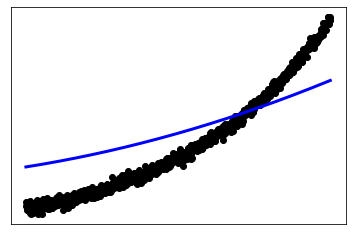

In [6]:
def L1_loss(y_pred, y):
  loss = y - y_pred
  return np.abs(loss)

def gradient(X, Y, w):
  y_pred = X@w.reshape(-1,1)
  pred_error = L1_loss(y_pred, Y)

  return -X.T@pred_error

def GradientDescent(X, Y, Epoch, ita):
  w = np.zeros((X.shape[1],1))

  for epochs in range(Epoch):
    w_grad = gradient(X, Y, w)
    w = w - ita*w_grad
  return w


HW3_z = np.hstack((np.ones_like(HW1_data['x']), np.concatenate((np.multiply(HW1_data['x'], HW1_data['x']), HW1_data['x']), axis=1)))
w = GradientDescent(HW3_z, HW1_Y, 180, 0.00001)
print(w)

plt.scatter(HW1_data['x'], HW1_data['y'],  color='black')
plt.plot(HW1_data['x'], np.sum(w.T*HW3_z, axis=1).reshape(-1,1), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# **4. (10%) In ‘train.mat,’ you can find 2-D points X=[x1, x2] and their corresponding labels Y=y. Please use logistic regression to find the decision boundary**

In [7]:
import math

class Logistic_Regression():
  def __init__(self, file_name):
    Data = sio.loadmat(file_name)
    self.X = np.hstack((np.array(Data['x1']), np.array(Data['x2'])))
    self.Y = np.array(Data['y'])

  def GradientDescent(self, Epoch, ita):
    w = np.zeros((self.X.shape[1],1))
    b = np.zeros((1,1))
    for epochs in range(Epoch):
      w_grad, b_grad = self.gradient(w, b)
      w = w - ita*w_grad
      b = b - ita*b_grad
    return (w, b)

  def sigmoid(self, z):
    return np.clip(1 / (1.0 + np.exp(-z)), 1e-8, 1 - (1e-8))

  def pred_Y(self,x, w, b):
    return self.sigmoid(x@w + b)

  def gradient(self, w, b):
    y_pred = self.pred_Y(self.X, w, b).reshape(-1,1)
    pred_error = self.Y - y_pred

    w_grad = -np.sum(self.X.T@pred_error, axis=1).reshape(self.X.shape[1],1)
    b_grad = -np.sum(pred_error)
    return w_grad, b_grad

  def predict(self, test_file, w, b):
    predict_Data = sio.loadmat(test_file)
    predict_X = np.hstack((np.array(predict_Data['x1']), np.array(predict_Data['x2'])))
    predict_Y = np.round(self.pred_Y(predict_X, w, b)).astype(np.int)
    ans = 0
    for i in range(len(predict_Y)):
      if predict_Y[i] == self.Y[i]:
        ans += 1

    return ans*100/len(predict_Y)


In [8]:
file_train = 'train.mat'
file_test = 'test.mat'

HW4 = Logistic_Regression(file_train)

w, b = HW4.GradientDescent(2000, 0.05)
print('error rate:', HW4.predict(file_test, w, b))

error rate: 46.666666666666664


# **5.1.Use the following code to show 50 images in your own dataset.**

In [9]:
from __future__ import print_function
import keras
from keras.datasets import mnist
import random
import numpy as np

def set_split(data_set, num):
  ret_set = []
  rand = int(random.random()*len(data_set)//num)
  for i in range(num):
    ret_set.append(data_set[i+rand])

  return np.array(ret_set)

# input image dimensions 28x28
img_rows, img_cols = 28, 28
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

x_train = set_split(x_train, 1000)
x_test = set_split(x_test, 1000)

11493376/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


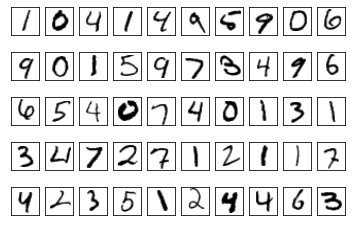

In [10]:
import matplotlib.pyplot as plt
amount= 50
lines = 5
columns = 10
number = np.zeros(amount)
for i in range(amount):
 number[i] = y_test[i]
 # print(number[0])
fig = plt.figure()
for i in range(amount):
 ax = fig.add_subplot(lines, columns, 1 + i)
 plt.imshow(x_test[i,:,:], cmap='binary')
 plt.sca(ax)
 ax.set_xticks([], [])
 ax.set_yticks([], [])
plt.show()

# **5.2.Normalize the data (subtracting the mean from it and then dividing it by the standard deviation) and compute the eigenpairs for the covariance of the data sorted in a descending order based on eigenvalues).**

In [11]:
def Normalization(data_set):
  data = data_set.reshape(data_set.shape[0], -1)
  std = np.std(data, axis=0)
  mean = np.mean(data, axis=0)

  return np.nan_to_num((data-mean)/std)

def Covariance(data_set):
  mean = np.mean(data_set, axis=0)
  data = (data_set - mean)/data_set.shape[0]

  covariance = data.T@data
  eigenvalues, eigenvectors = np.linalg.eig(covariance)

  return (eigenvalues, eigenvectors)

data_set = Normalization(x_train)
eig_val, eig_vec = Covariance(data_set)

eig_pair = sorted(list(zip(eig_val, eig_vec.tolist())), reverse=True)
eig_val, eig_vec = zip(*eig_pair)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


# **5.3.Please use PCA to reduce the 784 dimensional data to that with 500, 300, 100,and 50 dimensions, and then show the decoding results, respectively. How do you interpret the results?**

In [12]:
def PCA(data_set, eigenvectors, extract_num):
  return np.dot(data_set, (eigenvectors[:extract_num]).T)

PCA_500 = PCA(data_set, np.array(eig_vec), 500)
PCA_300 = PCA(data_set, np.array(eig_vec), 300)
PCA_100 = PCA(data_set, np.array(eig_vec), 100)
PCA_50 = PCA(data_set, np.array(eig_vec), 50)

Covariance的eigenvalue代表了features的變化趨勢，越大則其越重要；負數則表示其為負相關。

而扣除掉相關聯較小的eigenvalue所對應的eigenvector後，
與原feature相乘等同於對feature做基底轉換；而eigenvalue小(關聯性、重要性小)的feature就會因與其他基底垂直而消失。


# **6.The dataset contains a log of network activities from two users (named 'P' and 'R').An activity has eight different features (Field 1~8), which include categorical and numerical data. Our goal is to predict the user based on its activity record. Please use logistic regression to train a model on the training dataset (“PBP_train.csv”) and then test it on “PBP_test.csv.” The test results and accuracy need to be included in the report.**

In [13]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/'My Drive'/'Colab Notebooks'/DL_HW/

HW6_train = 'PBP_train.csv'
HW6_test = 'PBP_test.csv'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks/DL_HW


In [14]:
def Encording_features(data_file):
  Data = pd.read_csv(data_file)
  X = np.asarray(Data[['Field 1','Field 2','Field 3','Field 4','Field 5','Field 6','Field 7','Field 8']])

  #找出Field 1及Field 2中所有字串
  onehot_dict_field1 = []
  onehot_dict_field2 = []
  for row in X:
    if row[0] not in onehot_dict_field1:
      onehot_dict_field1.append(row[0])
    if row[1] not in onehot_dict_field2:
      onehot_dict_field2.append(row[1])

  encord_X = []
  temp = []
  for row in X:
    temp = [0]*(len(onehot_dict_field1)+len(onehot_dict_field2)) + list(row)[2:]
    for feature in range(len(onehot_dict_field1)):
      if row[0] == onehot_dict_field1[feature]:
        temp[feature] = 1
    for feature in range(len(onehot_dict_field2)):
      if row[1] == onehot_dict_field2[feature]:
        temp[len(onehot_dict_field1) + feature] = 1
  
    temp[-3] = int(temp[-3][-2:]) + 60*int(temp[-3][:-3])
    encord_X.append(temp)

  return np.nan_to_num(np.array(encord_X, dtype=float))

def Encording_tags(data_file):
  Data = pd.read_csv(data_file)
  Y = np.asarray(Data['Name'])

  for row in range(len(Y)):
    if Y[row] == 'P':
      Y[row] = 0
    else:
      Y[row] = 1
      
  return Y.astype(float)

HW6_X_train = Encording_features(HW6_train)
HW6_Y_train = Encording_tags(HW6_train)

In [15]:
#max - Normalization 保留離散性 
def Normalization(data_set):
  return data_set/data_set.max(axis=0)

def Covariance(data_set):
  mean = np.mean(data_set, axis=0)
  data = (data_set - mean)/data_set.shape[0]

  covariance = data.T@data
  eigenvalues, eigenvectors = np.linalg.eig(covariance)

  return (eigenvalues, eigenvectors)


HW6_X_train = Normalization(HW6_X_train)

eig_val2, eig_vec2 = Covariance(HW6_X_train)

eig_pair2 = sorted(list(zip(eig_val2, eig_vec2.tolist())), reverse=True)
eig_val2, eig_vec2 = zip(*eig_pair2)

print(eig_val2)

(8.696590579335935e-06, 7.446508474379783e-06, 7.273837191631866e-06, 7.106082724463887e-06, 6.556727367954574e-06, 6.365020199729147e-06, 6.186907651149942e-06, 6.006173043266837e-06, 5.970134615616727e-06, 5.792390626769678e-06, 5.547990251819747e-06, 5.253505270758254e-06, 5.052925277577518e-06, 4.994950507060716e-06, 4.7678374401481975e-06, 4.55819598004768e-06, 4.458185390105813e-06, 4.301284443295944e-06, 4.249989034327122e-06, 4.129249560440303e-06, 4.039271743603579e-06, 3.972661152391707e-06, 3.875563841392746e-06, 3.871052057450608e-06, 3.7572996841184424e-06, 3.7247184000658093e-06, 3.6148668968299497e-06, 3.5664197480565953e-06, 3.5103683060792144e-06, 3.4150444069285182e-06, 3.381145903306393e-06, 3.2233696244265025e-06, 2.9389984664130995e-06, 2.896170643405753e-06, 2.7341148143066064e-06, 2.566826399034481e-06, 2.3618053774110633e-06, 1.919031987966089e-06, 1.8326511836485955e-06, 9.459617296849219e-07, 5.749685274364291e-07, 2.3552128572293337e-21, -2.48467222634706e-21

In [16]:
def PCA(data_set, eigenvectors, extract_num):
  return np.dot(data_set, (eigenvectors[:extract_num]).T)

#使用PCA做降維
HW6_X_train = PCA(HW6_X_train, np.array(eig_vec2), 39)

In [17]:
class HW6_regression():
  def __init__(self, X, Y):
    self.X = X/X.max(axis=0)
    self.Y = Y.reshape(-1,1)


  def GradientDescent(self, Epoch, ita):
    w = np.zeros((self.X.shape[1],1))
    b = np.zeros((1,1))
    for epochs in range(Epoch):
      w_grad, b_grad = self.gradient(w, b)
      w = w - ita*w_grad
      b = b - ita*b_grad
    return (w, b)

  def sigmoid(self, z):
    return np.clip(1/(1.0 + np.exp(-z)), 1e-8, 1 - (1e-8))

  def pred_Y(self,x, w, b):
    return self.sigmoid(x@w + b)

  def gradient(self, w, b):
    y_pred = self.pred_Y(self.X, w, b).reshape(-1,1)
    pred_error = self.Y - y_pred

    w_grad = -np.sum(self.X.T@pred_error, axis=1).reshape(-1,1)
    b_grad = -np.sum(pred_error)
    return w_grad, b_grad

  def predict_Y(self, X_test, w, b):
    predict_Y = np.round(self.pred_Y(X_test, w, b))
    ret = []

    for i in range(len(predict_Y)):
      if predict_Y[i] > 0:
        ret.append('R')
      else:
        ret.append('P')

    return ret

HW6 = HW6_regression(HW6_X_train, HW6_Y_train)

w, b = HW6.GradientDescent(10000, 0.005)
HW6_X_test = PCA(Encording_features(HW6_test), np.array(eig_vec2), 39)

print('predict result:', HW6.predict_Y(HW6_X_test, w, b))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


predict result: ['R', 'P', 'R', 'P', 'R', 'R', 'R', 'R', 'R', 'P', 'R', 'R', 'R', 'R', 'R', 'P', 'R', 'R', 'R', 'R']


**預測為 :　['R', 'P', 'R', 'P', 'R', 'R', 'R', 'R', 'R', 'P', 'R', 'R', 'R', 'R', 'R', 'P', 'R', 'R', 'R', 'R']**